In [1]:
!pip install simpletransformers
#SimpleTransformers is an open-source library that allows you to use the power of state-of-the-art transformer models for natural language processing tasks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 KB

# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import GridSearchCV

from simpletransformers.ner import NERModel,NERArgs
from gensim.models import Word2Vec

# Preprocessing for Course Data

In [3]:
data = pd.read_excel('ML_data.xlsx')
data.head()

word    course    sentence      tag
0    master  course 0  Sentence 0        O
1   machine  course 0  Sentence 0  B-skill
2  learning  course 0  Sentence 0  I-skill
3        on  course 0  Sentence 0        O
4    python  course 0  Sentence 0  B-skill

In [4]:
print("Unique words in corpus:", data['word'].nunique())
print("Unique tags in corpus:", data['tag'].nunique())

Unique words in corpus: 651
Unique tags in corpus: 3


Crating label encoded versions of the sentence column.

In [5]:
data["sentence"] = LabelEncoder().fit_transform(data["sentence"])
data.head()

word    course  sentence      tag
0    master  course 0         0        O
1   machine  course 0         0  B-skill
2  learning  course 0         0  I-skill
3        on  course 0         0        O
4    python  course 0         0  B-skill

In [6]:
data.rename(columns={"sentence":"sentence_id","word":"words","tag":"labels"}, inplace =True)
data["labels"] = data["labels"].str.upper()
data.head()

words    course  sentence_id   labels
0    master  course 0            0        O
1   machine  course 0            0  B-SKILL
2  learning  course 0            0  I-SKILL
3        on  course 0            0        O
4    python  course 0            0  B-SKILL

In [7]:
data.shape

(1808, 4)

## Splitting dataset
80-20 train and test data.
1446 row for train,362 row for test data

In [8]:
"""X = data[["sentence_id","words"]]
Y = data["labels"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2,random_state=42) 
#building up train data and test data
train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})"""

'X = data[["sentence_id","words"]]\nY = data["labels"]\nx_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2,random_state=42) \n#building up train data and test data\ntrain_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})\ntest_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})'

In [9]:
X = data[["sentence_id","words"]]
Y = data["labels"]

In [10]:
x_temp, x_test, y_temp, y_test = train_test_split(X,Y, test_size =0.10,random_state=42) 
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size =0.16,random_state=42)

In [11]:
train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
val_data = pd.DataFrame({"sentence_id":x_val["sentence_id"],"words":x_val["words"],"labels":y_val})
test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

In [12]:
print(train_data.shape)
print(val_data.shape)

print(test_data.shape)


(1366, 3)
(261, 3)
(181, 3)


In [13]:
train_data

sentence_id            words labels
502           147             data      O
459           144              and      O
59            183            model      O
635           162              and      O
526           149  hyperparameters      O
...           ...              ...    ...
996            17              and      O
1300           54     optimization      O
1781           96         advanced      O
1484           70              how      O
1521           72        sagemaker      O

[1366 rows x 3 columns]

In [14]:
val_data

sentence_id      words labels
1298           54     random      O
46            161        and      O
795           179  sentiment      O
784           177        and      O
1057           28         to      O
...           ...        ...    ...
606           159       used      O
989            16       more      O
1240           50      train      O
1337           58        how      O
37            150   personal      O

[261 rows x 3 columns]

# NER Model Training

In [15]:
label = data["labels"].unique().tolist()
label

['O', 'B-SKILL', 'I-SKILL']

## Hyperparameters for NERArgs

num_train_epochs: The number of times the model will see the entire training dataset during training.

learning_rate: The step size at which the optimizer will update the model's weights during training.

overwrite_output_dir: Whether the output directory should be overwritten if it already exists.

train_batch_size: The number of training examples processed in a single batch during training.

eval_batch_size: The number of examples processed in a single batch during evaluation.

In [16]:
import sklearn.metrics


In [17]:
args = NERArgs()
args.overwrite_output_dir = True



In [18]:
num_train_epochs = [4, 6, 8]
learning_rates = [0.01,0.0001, 0.00001] #0.0001,...
batch_sizes = [16, 32, 64]
optimizers = "AdamW"

## BERT
- 'label' is ['O', 'B-SKILL', 'I-SKILL']

- 'bert-base-uncased', is a BERT model trained on a large dataset of lowercased English text.

- 'bert', specifies the type of model to use. In this case, the model is using the BERT (Bidirectional Encoder Representations from Transformers) architecture

- 'args' argument specifies a set of hyperparameters for training the model

In [19]:
# Store the results in lists
epochs_list = []
learning_rates_list = []
batch_sizes_list = []

results_list = []

for epochs in num_train_epochs:
  for learning_rate in learning_rates:
    for batch_size in batch_sizes:

        args.num_train_epochs = epochs
        args.learning_rate = learning_rate
        args.train_batch_size = batch_size
        args.eval_batch_size = batch_size
      
        model = NERModel('bert', 'bert-base-uncased', labels = label, args=args)
        model.train_model(train_data, eval_data=val_data, acc=accuracy_score)
        result, model_outputs, preds_list = model.eval_model(val_data)
        

        epochs_list.append(epochs)
        learning_rates_list.append(learning_rate)
        batch_sizes_list.append(batch_size)
        results_list.append(result)
        print("Result: ",result)
        print(f"For:Epochs{epochs},LR:{learning_rate},Batch_size:{batch_size}".format(epochs=epochs,learning_rate=learning_rate,batch_size=batch_size))



Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Result:  {'eval_loss': 0.578454926609993, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs4,LR:0.01,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5866253256797791, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs4,LR:0.01,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.6333653728167216, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs4,LR:0.01,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.2856948107687963, 'precision': 0.8387096774193549, 'recall': 0.6190476190476191, 'f1_score': 0.7123287671232876}
For:Epochs4,LR:0.0001,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.28431267440319063, 'precision': 0.8214285714285714, 'recall': 0.5476190476190477, 'f1_score': 0.6571428571428571}
For:Epochs4,LR:0.0001,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.3569072186946869, 'precision': 1.0, 'recall': 0.07142857142857142, 'f1_score': 0.13333333333333333}
For:Epochs4,LR:0.0001,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.49606407350964016, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs4,LR:1e-05,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.641074800491333, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs4,LR:1e-05,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.6616464058558146, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs4,LR:1e-05,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5584234065479703, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs6,LR:0.01,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5794245064258575, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs6,LR:0.01,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5787656704584757, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs6,LR:0.01,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.4037256684516453, 'precision': 0.8285714285714286, 'recall': 0.6904761904761905, 'f1_score': 0.7532467532467533}
For:Epochs6,LR:0.0001,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.2663202479481697, 'precision': 0.7073170731707317, 'recall': 0.6904761904761905, 'f1_score': 0.6987951807228916}
For:Epochs6,LR:0.0001,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.3073197901248932, 'precision': 0.875, 'recall': 0.5, 'f1_score': 0.6363636363636364}
For:Epochs6,LR:0.0001,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.4176247947745853, 'precision': 1.0, 'recall': 0.047619047619047616, 'f1_score': 0.0909090909090909}
For:Epochs6,LR:1e-05,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5495065748691559, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs6,LR:1e-05,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.6154072682062784, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs6,LR:1e-05,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5645883248911964, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs8,LR:0.01,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5781677782535553, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs8,LR:0.01,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5649124582608541, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs8,LR:0.01,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.48953523839979124, 'precision': 0.84375, 'recall': 0.6428571428571429, 'f1_score': 0.7297297297297298}
For:Epochs8,LR:0.0001,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.45242513418197633, 'precision': 0.84375, 'recall': 0.6428571428571429, 'f1_score': 0.7297297297297298}
For:Epochs8,LR:0.0001,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.35499808688958484, 'precision': 0.8888888888888888, 'recall': 0.5714285714285714, 'f1_score': 0.6956521739130435}
For:Epochs8,LR:0.0001,Batch_size:64


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/9 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.3728876875506507, 'precision': 0.8461538461538461, 'recall': 0.2619047619047619, 'f1_score': 0.4}
For:Epochs8,LR:1e-05,Batch_size:16


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.4639573752880096, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs8,LR:1e-05,Batch_size:32


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3 [00:00<?, ?it/s]

Result:  {'eval_loss': 0.5817928512891134, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
For:Epochs8,LR:1e-05,Batch_size:64


In [20]:
results_list

[{'eval_loss': 0.578454926609993,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 {'eval_loss': 0.5866253256797791,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 {'eval_loss': 0.6333653728167216,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 {'eval_loss': 0.2856948107687963,
  'precision': 0.8387096774193549,
  'recall': 0.6190476190476191,
  'f1_score': 0.7123287671232876},
 {'eval_loss': 0.28431267440319063,
  'precision': 0.8214285714285714,
  'recall': 0.5476190476190477,
  'f1_score': 0.6571428571428571},
 {'eval_loss': 0.3569072186946869,
  'precision': 1.0,
  'recall': 0.07142857142857142,
  'f1_score': 0.13333333333333333},
 {'eval_loss': 0.49606407350964016,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 {'eval_loss': 0.641074800491333,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 {'eval_loss': 0.6616464058558146,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 {'eval_loss': 0.5584234065479703,
  'precision': 

{'eval_loss': 0.4037256684516453,
  'precision': 0.8285714285714286,
  'recall': 0.6904761904761905,
  'f1_score': 0.7532467532467533},
For:Epochs6,LR:0.0001,Batch_size:16


In [21]:
args.num_train_epochs = 6
args.train_batch_size = 16
args.eval_batch_size = 16
args.learning_rate = 0.0001
args.optimizer = 'AdamW'



In [22]:
model = NERModel('bert', 'bert-base-uncased', labels = label, args = args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [23]:
model.train_model(train_data,eval_data = val_data,acc=accuracy_score)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/12 [00:00<?, ?it/s]

(72, 0.15580252337450576)

## Results for BERT
Overall, the evaluation results show that the model is performing well, with a low eval loss, high precision, and high F1 score. The recall is somewhat lower than the other metrics, which may indicate that the model is missing some positive examples.

In [24]:
result, model_outputs, preds_list = model.eval_model(test_data)
result

  0%|          | 0/1 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.2881836045001234,
 'precision': 0.8,
 'recall': 0.8571428571428571,
 'f1_score': 0.8275862068965518}

In [25]:
prediction, model_output = model.predict(["master machine learning on sql"])
prediction

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'master': 'O'},
  {'machine': 'B-SKILL'},
  {'learning': 'I-SKILL'},
  {'on': 'O'},
  {'sql': 'B-SKILL'}]]

# Most frequent ML engineer skills for calculate similarity


In [26]:
ML_skills = []

In [27]:
df_skill = pd.read_csv("ML_skills.csv", header=None, sep=";")
df_skill["skills"] = [row.split("{")[2] for row in df_skill[0]]
df_skill= df_skill.drop(columns=0,axis=1)
df_skill.head()
df_skill['skills'] = df_skill['skills'].apply(lambda x: x.split(", 'skill'")[1])
def clean(text):
    cleaned_text = text[2:-3]
    a = cleaned_text.split(", ")
    a = [i[1:-1] for i in a]
    return a

df_skill["skills"] = df_skill["skills"].apply(clean)
f = lambda x: ','.join(map(str, x)) if isinstance(x, list) else x
df_skill['skills'] = df_skill['skills'].apply(f)
df_skill['skills'] = df_skill['skills'].apply(lambda x: x.replace("'", ''))
df_skill['skills'] = df_skill['skills'].str.lower()

In [28]:
def remove_duplicate_words(string):
  words = string.split(",")
  unique_words = []

  # iterate through the list of words
  for word in words:
    # if the word is not in the list of unique words, append it
    if word not in unique_words:
      unique_words.append(word)

  # join the list of unique words into a string and return it
  return ", ".join(unique_words)

df_skill["skills"] = df_skill["skills"].apply(remove_duplicate_words)

In [29]:
df_skill['words'] = df_skill['skills'].apply(lambda x: x.split(","))
word_freq = {}
for row in df_skill['words']:
    for word in row:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

In [30]:
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_15_words = sorted_word_freq[:15]
for word, freq in top_15_words:
    ML_skills.append(word)
    print(f'{word}: {freq}')

 python: 63
 java: 60
 c++: 59
 machine learning: 56
 sql: 51
 c: 44
 deep learning: 41
 matlab: 40
 data analysis: 35
 r: 34
 tensorflow: 32
 algorithms: 31
 data mining: 30
 linux: 29
 mysql: 27


In [31]:
ML_skills

[' python',
 ' java',
 ' c++',
 ' machine learning',
 ' sql',
 ' c',
 ' deep learning',
 ' matlab',
 ' data analysis',
 ' r',
 ' tensorflow',
 ' algorithms',
 ' data mining',
 ' linux',
 ' mysql']

In [32]:
separated_skills = []
for skill in ML_skills:
  words = skill.split(' ')  # Split the skill on the space character
  separated_skills.extend(words)  # Add the words to the separated_skills list
separated_skills = [skill for skill in separated_skills if skill != '']
print(separated_skills)

['python', 'java', 'c++', 'machine', 'learning', 'sql', 'c', 'deep', 'learning', 'matlab', 'data', 'analysis', 'r', 'tensorflow', 'algorithms', 'data', 'mining', 'linux', 'mysql']


# Reading the ML course phrases

In [33]:
ML_phrases = pd.read_excel('ML_phrases.xlsx')
ML_phrases

text     course
0                  master machine learning on python r   course 0
1    have a great intuition of many machine learnin...   course 0
2                            make accurate predictions   course 0
3                               make powerful analysis   course 0
4                  make robust machine learning models   course 0
..                                                 ...        ...
189                         multiple linear regression  course 14
190                                logistic regression  course 14
191                                   cluster analysis  course 14
192                                  kmeans clustering  course 14
193                                     decision trees  course 14

[194 rows x 2 columns]

## Creating dict includes only skill entities for each courses
Skill entites found earlier by NER

In [34]:
course_dict = {}
for row in ML_phrases.iterrows():
  row = row[1]
  text = row['text']
  words = text.split()
  course = row['course']
  if course not in course_dict:
    course_dict[course] = []
  entities, _ = model.predict([text])
  lst = []
  for i, word in enumerate(words):
    if(entities[0][i][word]!= 'O'):
      lst.append(word)
  course_dict[course].extend(lst)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#course_dict

# Word2Vec Model
Loading the word2vec course outcome model. 
  More info. at: 
  
  AIN311_Project/tree/main/word2vec_model

In [35]:
model = Word2Vec.load("course.model")

Using the minimum and maximum similarity can be useful in certain situations because it gives you a sense of the range of similarities between the words in the course and the skills. For example, if the minimum similarity is very low and the maximum similarity is very high, it could indicate that there is a wide range of similarity between the words in the course and the skills. On the other hand, if the minimum and maximum similarities are both relatively high, it could indicate that the words in the course are generally more similar to the skills.

Using the minimum and maximum similarities can be a useful alternative to using the average similarity because it takes into account the full range of similarities, rather than just the central tendency represented by the average

In [36]:
similarities_mm = {}
for course in course_dict:
  entities = course_dict[course]
  min_similarity = 1.0 
  max_similarity = 0.0  
  for word in entities:
    for skill in separated_skills:
      try:
        similarity = model.wv.similarity(w1=word, w2=skill)
        min_similarity = min(min_similarity, similarity)  
        max_similarity = max(max_similarity, similarity) 
      except:
        continue
  similarities_mm[course] = (min_similarity, max_similarity)  


In [37]:
# Find the most similar courses related to most common ML skills
similarities_avg = {}
for course in course_dict:
  entities = course_dict[course]
  sum = 0
  length = 0
  for word in entities:
    for skill in separated_skills:
      try:
        sum+=model.wv.similarity(w1 = word, w2= skill)
        length+=1
      except:
        #print(word, skill)
        continue
  sum/=length #average

  similarities_avg[course] = sum

# RESULT
You can check each course below.

In [38]:
similarities_mm

{'course 0': (0.22614756, 1.0000001),
 'course 1': (0.06621457, 1.0000001),
 'course 2': (0.04924679, 1.0000001),
 'course 3': (0.052103404, 1.0000001),
 'course 4': (0.39707837, 1.0000001),
 'course 5': (-0.046932, 1.0000001),
 'course 6': (-0.024252607, 1.0000001),
 'course 7': (-0.062383033, 0.903998),
 'course 8': (0.13081045, 1.0000001),
 'course 9': (0.08792886, 1.0000001),
 'course 10': (0.34889883, 1.0000001),
 'course 11': (0.16041747, 1.0000001),
 'course 12': (0.09178447, 1.0000001),
 'course 13': (0.35168046, 1.0000001),
 'course 14': (0.32516688, 1.0000001)}

In [39]:
similarities_avg

{'course 0': 0.8052156748668999,
 'course 1': 0.7439653310416774,
 'course 2': 0.7927622267225266,
 'course 3': 0.7276519705229615,
 'course 4': 0.8387397988276049,
 'course 5': 0.6579971082074653,
 'course 6': 0.614594061403874,
 'course 7': 0.525937425085541,
 'course 8': 0.7393539873789056,
 'course 9': 0.6481160606172952,
 'course 10': 0.7730785151096907,
 'course 11': 0.6748861582441763,
 'course 12': 0.7437144104095007,
 'course 13': 0.8162074960542448,
 'course 14': 0.7567035203630273}

Plot for similarities using min-max

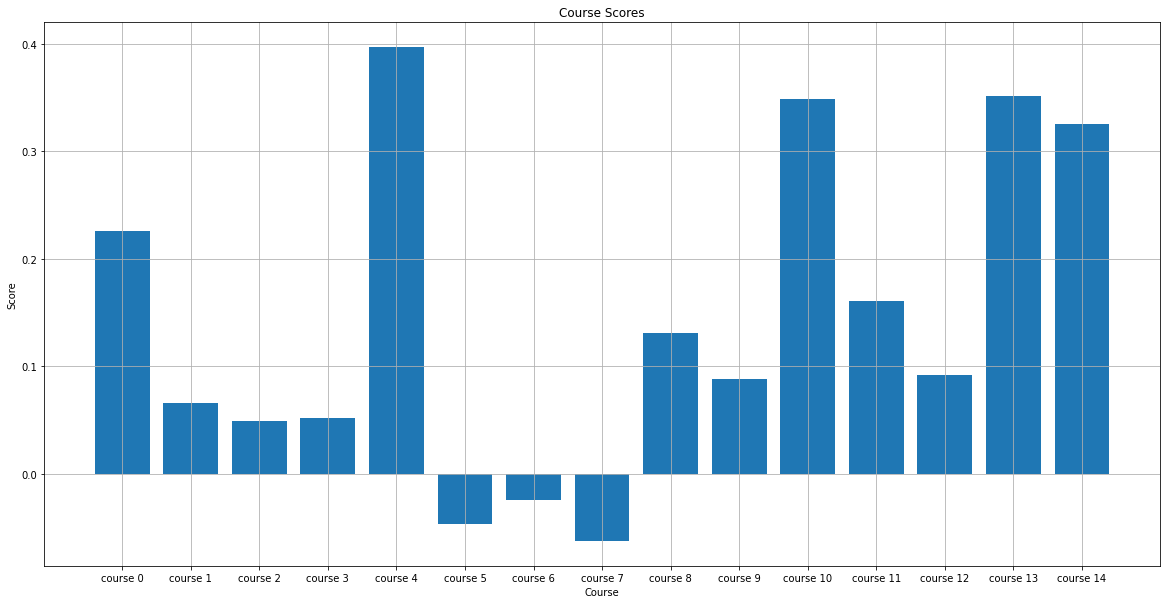

In [45]:
fig = plt.figure(figsize=(20, 10))

course_names = list(similarities_mm.keys())
scores = [v[0] for v in similarities_mm.values()]

plt.bar(course_names, scores)

plt.xlabel('Course')
plt.ylabel('Score')
plt.title('Course Scores')
plt.grid()

# Show the plot
plt.show()


Plot for similarities using average

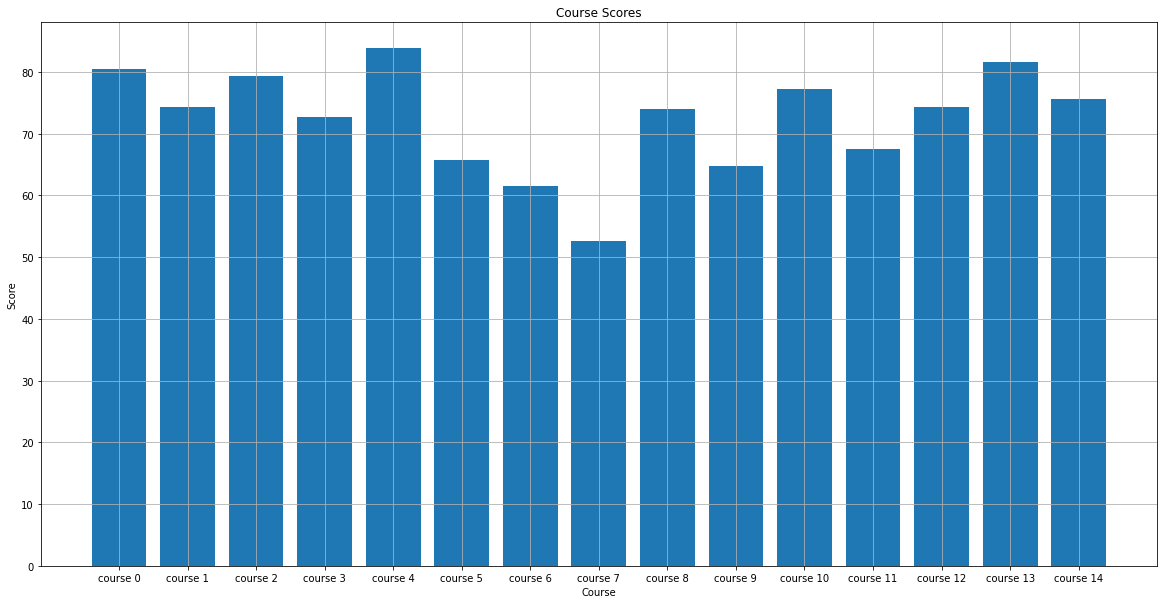

In [46]:
def y_format(y, pos):
    return '{:,.0f}'.format(y * 100)
fig = plt.figure(figsize=(20, 10))

course_names = list(similarities_avg.keys())
scores = list(similarities_avg.values())

plt.bar(course_names, scores)
plt.xlabel('Course')
plt.ylabel('Score')
plt.title('Course Scores')
formatter = FuncFormatter(y_format)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.show()

- Course 0: https://www.udemy.com/course/machinelearning/

- Course 1: https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

- Course 2: https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/

- Course 3: https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/

- Course 4: https://www.udemy.com/course/feature-engineering-for-machine-learning/

- Course 5: https://www.udemy.com/course/data-science-and-machine-learning-with-python-hands-on/

- Course 6: https://www.udemy.com/course/natural-language-processing-in-python/

- Course 7: https://www.udemy.com/course/deeplearning/

- Course 8: https://www.udemy.com/course/aws-machine-learning/

- Course 9: https://www.udemy.com/course/statsml_x/

- Course 10: https://www.udemy.com/course/data-science-deep-learning-in-python/

- Course 11: https://www.udemy.com/course/machine-learning-with-javascript/

- Course 12: https://www.udemy.com/course/become-an-aws-machine-learning-engineer-in-30-days-new-2022/

- Course 13: https://www.udemy.com/course/data-science-and-machine-learning-bootcamp-with-r/

- Course 14: https://www.udemy.com/course/excel-for-data-science-and-machine-learning/